In [1]:
import pandas as pd

from models import (
    NaiveMean,
    Autoregressive,
    MarkovEnsemble,
    LSTM,
)
from utils import prepend_columns, load_data, run_gdp_model

Using TensorFlow backend.


In [2]:
gdp_data = load_data('../results/gdp.csv', 'gdp')
gov_balance_data = load_data('../results/government_balance.csv', 'gov_balance')
industry_stock_data = load_data('../results/industry_stock.csv', 'ind_stock')

X_data = gdp_data.join(gov_balance_data).join(industry_stock_data)
Y_data = gdp_data.copy()
Y_data.index -= 1
Y_data = prepend_columns(Y_data, 'next')
Y_data = Y_data.join(pd.DataFrame(index=X_data.index), how='inner')
X_data = X_data.join(pd.DataFrame(index=Y_data.index), how='inner')

Train error: 1858.30582707
Test error: 1856.77512436


/usr/local/lib/python2.7/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


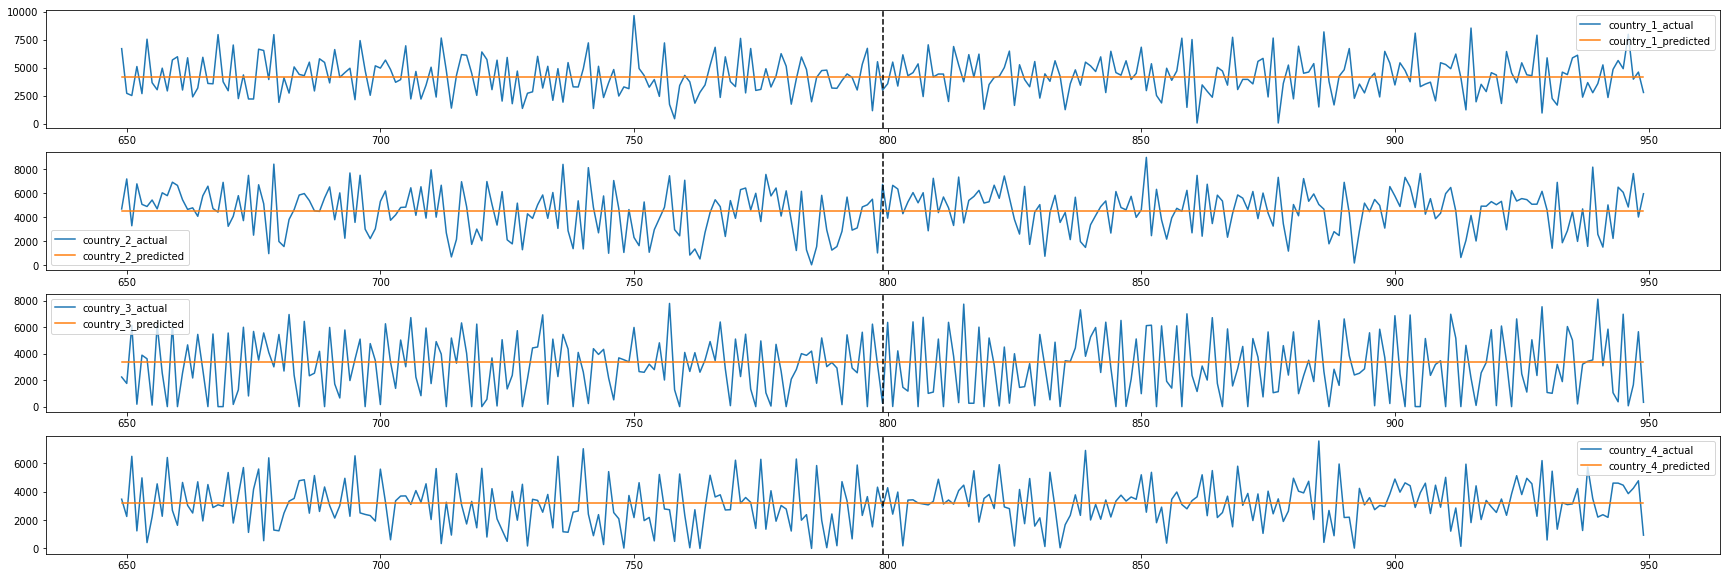

In [3]:
naive_mean = run_gdp_model(NaiveMean, X_data, Y_data)

/usr/local/lib/python2.7/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


Train error: 1093.11437438
Test error: 1147.2832114


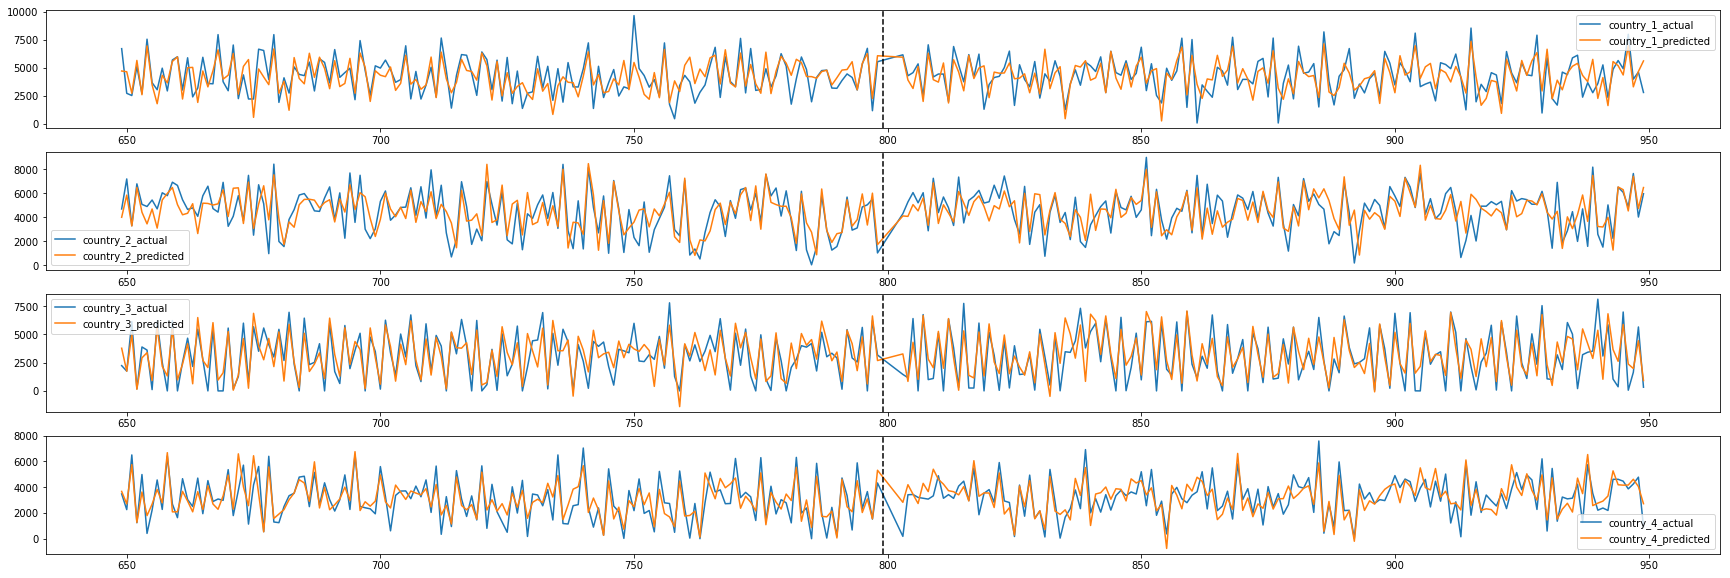

In [4]:
autoregressive = run_gdp_model(Autoregressive, X_data, Y_data, window=5)

Train error: 426.549868459
Test error: 1132.35705295


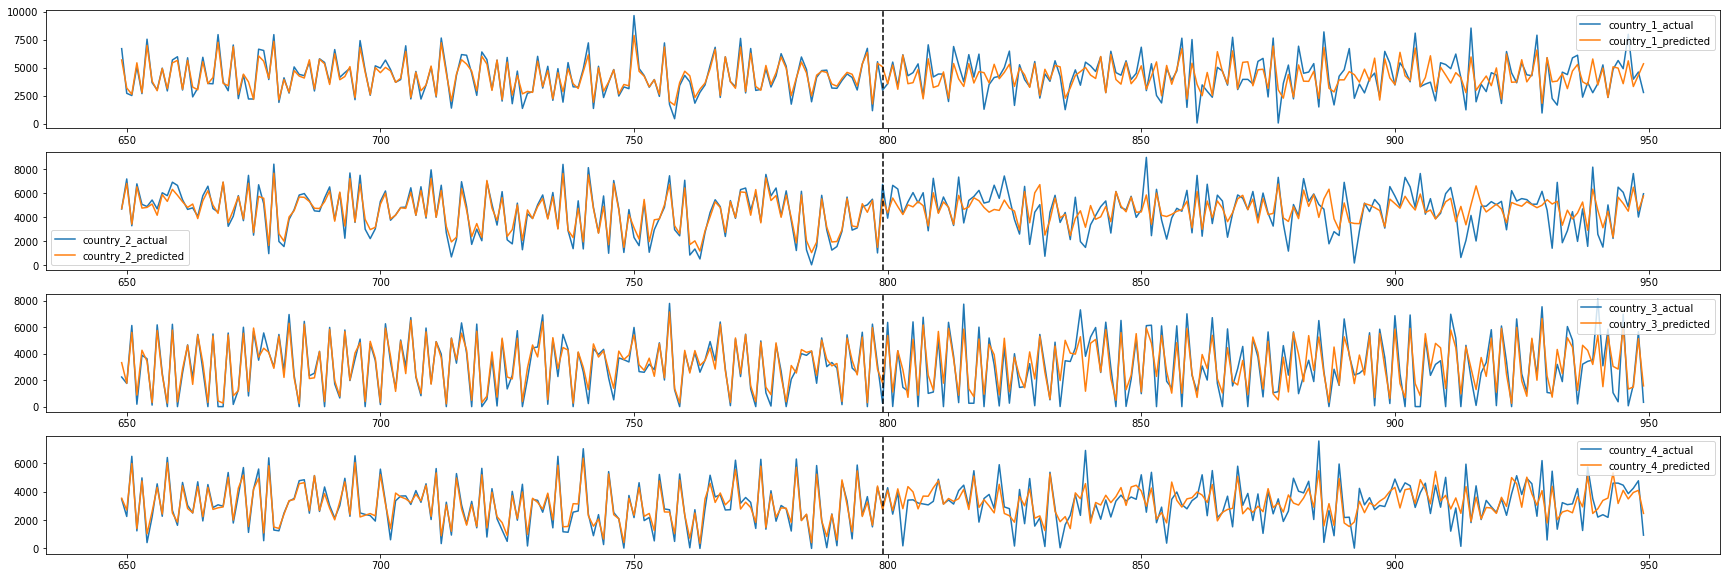

In [5]:
markov_ensemble = run_gdp_model(MarkovEnsemble, X_data, Y_data, max_features=0.5)

Train error: 854.562216774
Test error: 1098.11321696


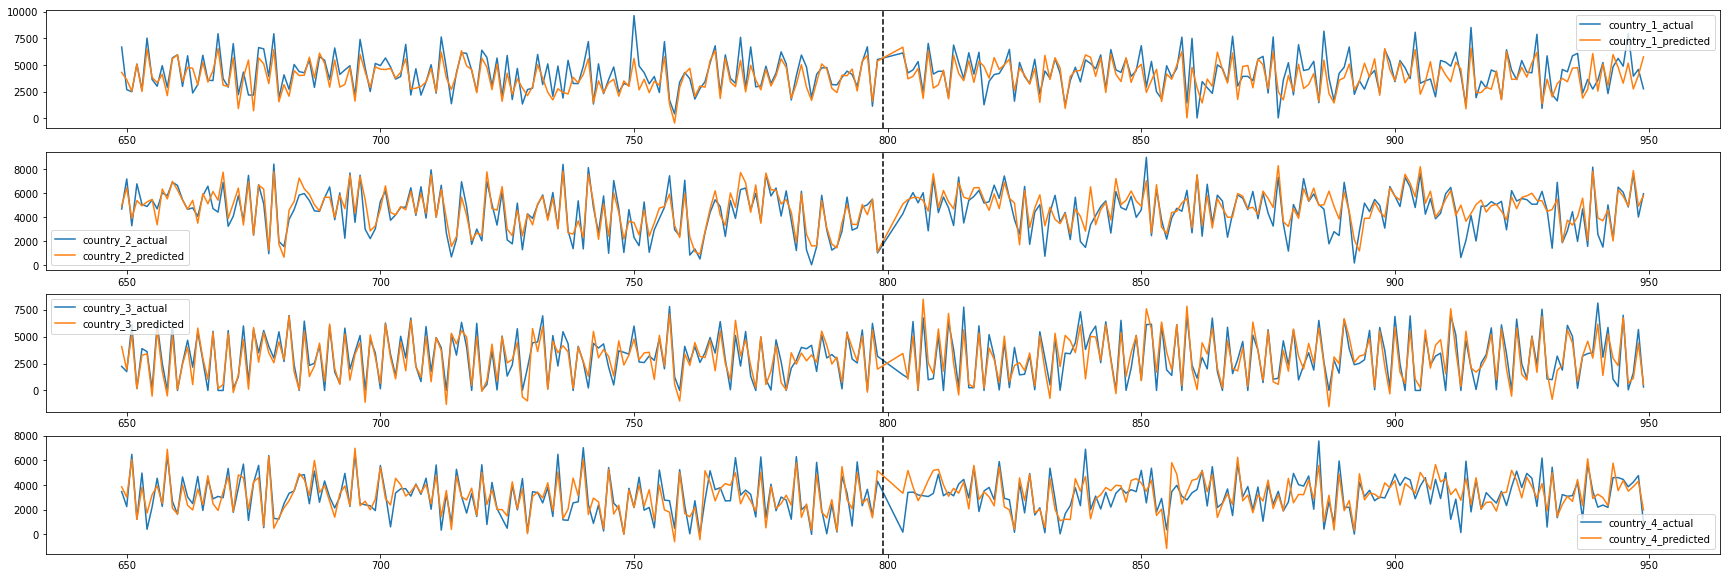

In [6]:
lstm = run_gdp_model(LSTM, X_data, Y_data, window=5, epochs=500)